### ЛР4

In [16]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression
warnings.simplefilter("ignore")

In [17]:
# чтение обучающей выборки
data = pd.read_csv('cwurData.csv')
data.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
    # "institution" - институт
le.fit(data.institution.drop_duplicates()) 
data.institution = le.transform(data.institution)
    # "country" - страна
le.fit(data.country.drop_duplicates()) 
data.country = le.transform(data.country)

In [27]:
data['broad_impact'] = data['broad_impact'].fillna(data['broad_impact'].mean())

<AxesSubplot:>

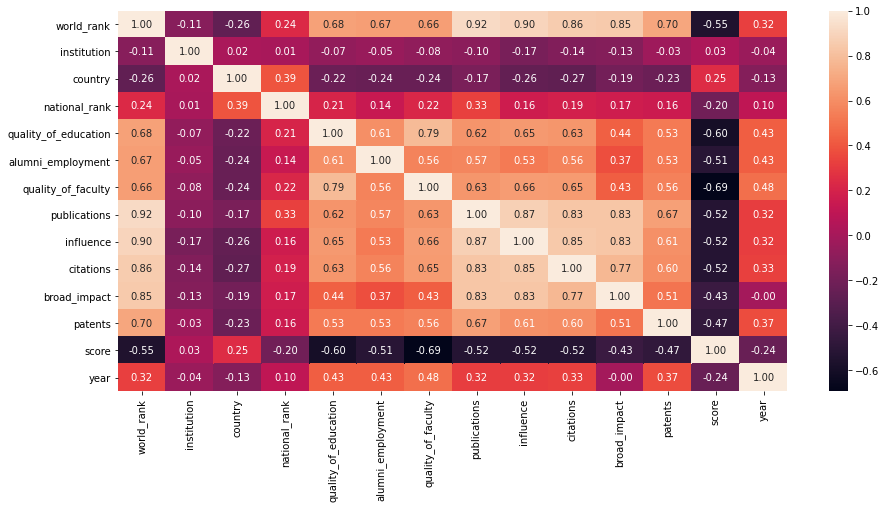

In [28]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [31]:
X = data.drop(['broad_impact'], axis = 1)
Y = data.broad_impact
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    world_rank  institution  country  national_rank  quality_of_education  \
0           1          184       54              1                     7   
1           2          312       54              2                     9   
2           3          511       54              3                    17   
3           4          637       57              1                    10   
4           5           53       54              4                     2   

   alumni_employment  quality_of_faculty  publications  influence  citations  \
0                  9                   1             1          1          1   
1                 17                   3            12          4          4   
2                 11                   5             4          2          2   
3                 24                   4            16         16         11   
4                 29                   7            37         22         22   

   patents   score  year  
0        5  100.0

In [32]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       world_rank  institution  country  national_rank  quality_of_education  \
98            99          966       33              2                   100   
30            31          571       57              4                    35   
712          513          113       47             19                   355   
1747         548         1016       17             23                   367   
703          504          328       54            161                   141   

      alumni_employment  quality_of_faculty  publications  influence  \
98                  101                 101            65        101   
30                  101                  45            27         23   
712                 395                 210           954        915   
1747                111                 218           995        827   
703                 157                 210           580        617   

      citations  patents  score  year  
98           

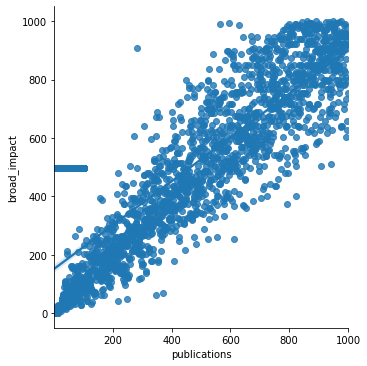

In [33]:
sns.lmplot(x = 'publications',y = 'broad_impact',data = data)

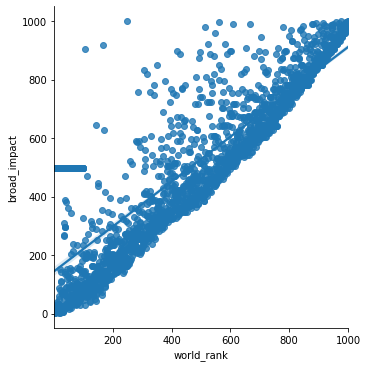

In [38]:
sns.lmplot(x='world_rank',y='broad_impact',data = data)

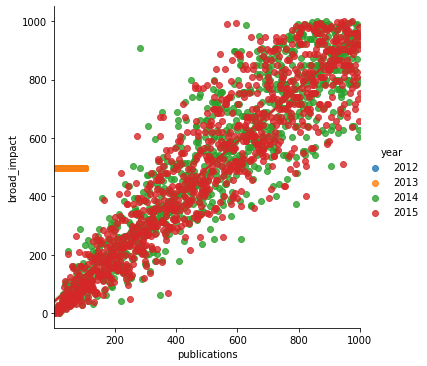

In [46]:
sns.lmplot(x = 'publications',y = 'broad_impact',hue = 'year',data = data)

### Построение линейной регрессии

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [48]:
Lin_Reg = LinearRegression().fit(X_train, Y_train)

lr_y_pred = Lin_Reg.predict(X_test)

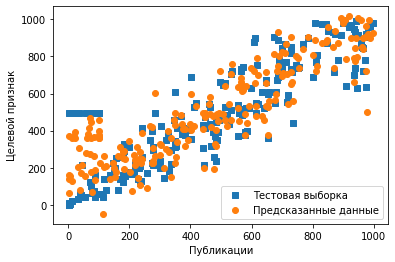

In [49]:
plt.scatter(X_test.publications, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.publications, lr_y_pred, marker = 'o', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('Публикации')
plt.ylabel ('Целевой признак')
plt.show()

### SVM

In [53]:
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

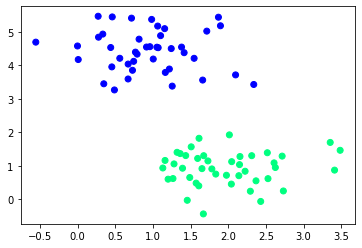

In [54]:
X , y = make_blobs(n_samples=125, centers=2, cluster_std=0.6, random_state=0)
# колич, кол кластеров, станд откл, 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=40, random_state=0)

plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

In [55]:
svc = SVC(kernel='linear')
svc.fit(train_X,train_y)

SVC(kernel='linear')

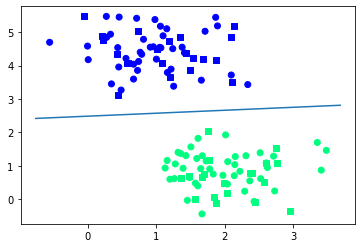

In [56]:
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_y, cmap='winter')

ax=plt.gca()
xlim=ax.get_xlim()
    
ax.scatter(test_X[:, 0], test_X[:, 1], c=test_y, cmap='winter', marker='s')

w= svc.coef_[0]
a= -w[0]/w[1]
xx=np.linspace(xlim[0], xlim[1])
yy= a * xx - (svc.intercept_[0]/ w[1])
plt.plot(xx, yy)

In [57]:
pred_y = svc.predict(test_X)

In [58]:
confusion_matrix(test_y, pred_y)

array([[21,  0],
       [ 0, 19]], dtype=int64)

### Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.tree import export_graphviz
from sklearn import tree
import re

In [72]:
data = pd.read_csv('cwurData.csv')
le = LabelEncoder()
    # "institution" - институт
le.fit(data.institution.drop_duplicates()) 
data.institution = le.transform(data.institution)
    # "country" - страна
le.fit(data.country.drop_duplicates()) 
data.country = le.transform(data.country)
data['broad_impact'] = data['broad_impact'].fillna(data['broad_impact'].mean())
data['broad_impact'] = data['broad_impact'].astype(int)
X = data[['score']]
Y = data.broad_impact
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

     score
0  100.00
1   91.67
2   89.50
3   86.17
4   85.21 

Выходные данные:

 0    496
1    496
2    496
3    496
4    496
Name: broad_impact, dtype: int32


In [73]:
# Обучим дерево на всех признаках iris
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [75]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
HTML('<pre>' + tree_rules + '</pre>')

In [ ]:
# The end.